In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import seaborn
from nsepy import get_history
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error

In [2]:
startDate=datetime(2010, 1,1)
endDate=datetime(2022, 10, 5)
StockData=get_history(symbol='SBIN', start=startDate, end=endDate)
print(StockData.shape)
StockData

(3164, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2010-01-04,SBIN,EQ,2269.00,2275.00,2300.0,2275.0,2294.0,2291.20,2291.26,1103147,2.527599e+14,NaN,313202,0.2839
2010-01-05,SBIN,EQ,2291.20,2308.00,2310.0,2280.1,2294.0,2292.05,2292.78,1161374,2.662776e+14,NaN,522468,0.4499
2010-01-06,SBIN,EQ,2292.05,2297.00,2315.0,2285.0,2300.0,2305.80,2301.72,1452793,3.343920e+14,NaN,577097,0.3972
2010-01-07,SBIN,EQ,2305.80,2306.00,2310.0,2281.1,2292.0,2292.90,2291.86,857651,1.965618e+14,NaN,333190,0.3885
2010-01-08,SBIN,EQ,2292.90,2294.00,2303.9,2280.1,2287.7,2286.05,2289.08,1045382,2.392961e+14,NaN,535343,0.5121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-21,SBIN,EQ,574.05,575.00,577.3,565.4,569.0,569.70,570.45,9392526,5.357999e+14,174676.0,3467830,0.3692
2022-09-22,SBIN,EQ,569.70,566.75,574.0,562.0,567.5,567.30,567.39,11869435,6.734594e+14,181550.0,5206546,0.4387
2022-09-23,SBIN,EQ,567.30,564.80,568.0,549.5,550.9,550.60,555.53,12563239,6.979216e+14,282839.0,5642445,0.4491


In [3]:
#you can just use matplotlib
#I was just trying seaborn 
seaborn.set_style("darkgrid")

<AxesSubplot:xlabel='TradeDate'>

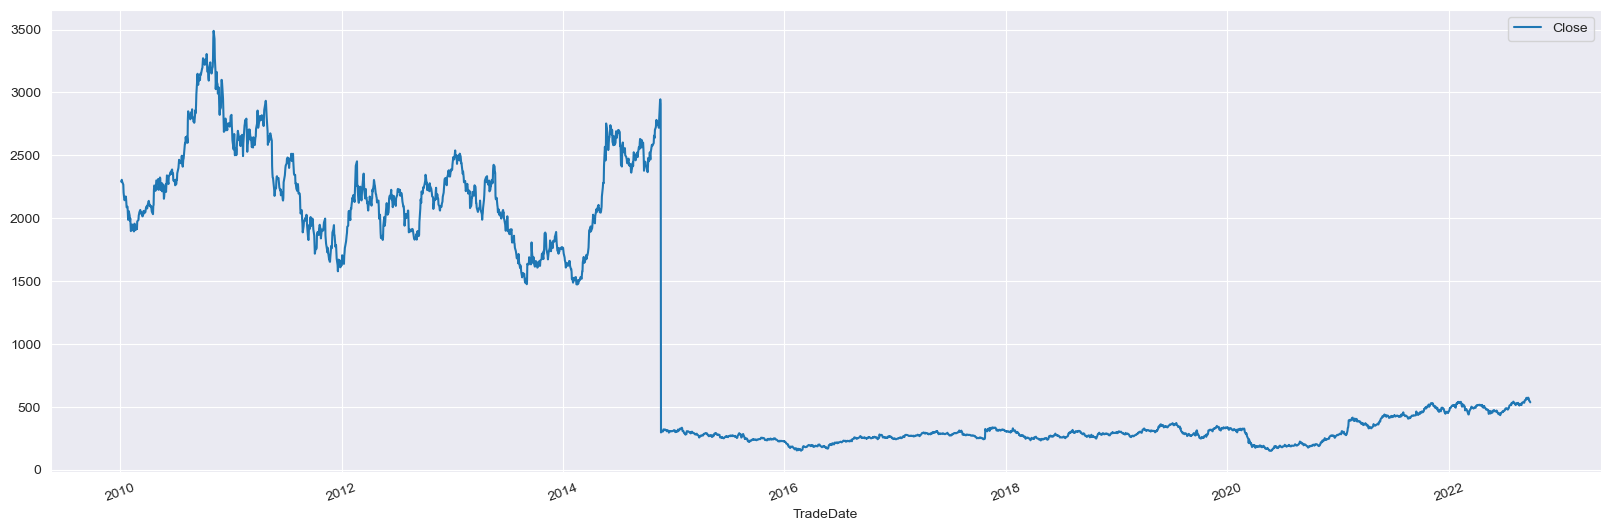

In [4]:
StockData['TradeDate']=StockData.index
%matplotlib inline
StockData.plot(x='TradeDate', y='Close', kind='line', figsize=(20,6), rot=20)

In [5]:
FullData=StockData[['Close']].values
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=MinMaxScaler()
DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)

In [6]:
X=X.reshape(X.shape[0],)

In [7]:

X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=10  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=5 # How many days in future you want to predict the prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###') 
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###') 
print(y_data.shape)

### Input Data Shape ###
(3149, 10, 1)
### Output Data Shape ###
(3149, 5)


In [8]:

# Choosing the number of testing data records
TestingRecords=5
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
#############################################
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
 
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(3144, 10, 1)
(3144, 5)

#### Testing Data shape ####
(5, 10, 1)
(5, 5)


In [9]:

# Visualizing the input and output being sent to the LSTM model
# Based on last 10 days prices we are learning the next 5 days of prices
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp)
    print('====>')
    print(out)
    print('#'*20)

[[0.64099608]
 [0.64125064]
 [0.64536851]
 [0.6415052 ]
 [0.63945375]
 [0.63380851]
 [0.61464167]
 [0.60646581]
 [0.60091042]
 [0.59671768]]
====>
[0.60062592 0.60562726 0.60165913 0.59095265 0.57994669]
####################
[[0.64125064]
 [0.64536851]
 [0.6415052 ]
 [0.63945375]
 [0.63380851]
 [0.61464167]
 [0.60646581]
 [0.60091042]
 [0.59671768]
 [0.60062592]]
====>
[0.60562726 0.60165913 0.59095265 0.57994669 0.58121949]
####################


In [10]:


# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# Initialising the RNN
regressor = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second hidden layer and the LSTM layer
 
# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 

# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor.add(Dense(units = FutureTimeSteps))
 
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
###################################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)
 
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')


Epoch 1/100
629/629 [==============================] - 17s 13ms/step - loss: 0.0196
Epoch 2/100
629/629 [==============================] - 9s 14ms/step - loss: 0.0014
Epoch 3/100
629/629 [==============================] - 9s 14ms/step - loss: 0.0013
Epoch 4/100
629/629 [==============================] - 9s 15ms/step - loss: 0.0013
Epoch 5/100
629/629 [==============================] - 10s 15ms/step - loss: 0.0012
Epoch 6/100
629/629 [==============================] - 9s 15ms/step - loss: 0.0012
Epoch 7/100
629/629 [==============================] - 10s 15ms/step - loss: 0.0012
Epoch 8/100
629/629 [==============================] - 9s 15ms/step - loss: 0.0011
Epoch 9/100
629/629 [==============================] - 9s 15ms/step - loss: 0.0011
Epoch 10/100
629/629 [==============================] - 9s 15ms/step - loss: 0.0011
Epoch 11/100
629/629 [==============================] - 9s 15ms/step - loss: 0.0010
Epoch 12/100
629/629 [==============================] - 9s 15ms/step - loss: 0.001

629/629 [==============================] - 6s 10ms/step - loss: 8.6253e-04
Epoch 95/100
629/629 [==============================] - 6s 10ms/step - loss: 8.6861e-04
Epoch 96/100
629/629 [==============================] - 6s 10ms/step - loss: 8.5103e-04
Epoch 97/100
629/629 [==============================] - 6s 10ms/step - loss: 8.6223e-04
Epoch 98/100
629/629 [==============================] - 6s 10ms/step - loss: 8.8415e-04
Epoch 99/100
629/629 [==============================] - 6s 10ms/step - loss: 8.5074e-04
Epoch 100/100
629/629 [==============================] - 6s 10ms/step - loss: 8.7034e-04
############### Total Time Taken:  13 Minutes #############


In [12]:

# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

1/1 [==============================] - 1s 585ms/step
#### Predicted Prices ####
[[530.6245  548.6603  530.0185  548.3517  555.0116 ]
 [539.97504 557.9842  539.5031  557.9573  564.7355 ]
 [543.9608  562.25494 543.033   562.11346 568.94617]
 [540.6941  559.1015  539.43005 558.70166 565.4695 ]
 [545.9472  564.0955  545.10974 563.99677 570.81134]]

#### Original Prices ####
[[571.75 572.15 561.8  572.25 574.05]
 [572.15 561.8  572.25 574.05 569.7 ]
 [561.8  572.25 574.05 569.7  567.3 ]
 [572.25 574.05 569.7  567.3  550.6 ]
 [574.05 569.7  567.3  550.6  543.3 ]]


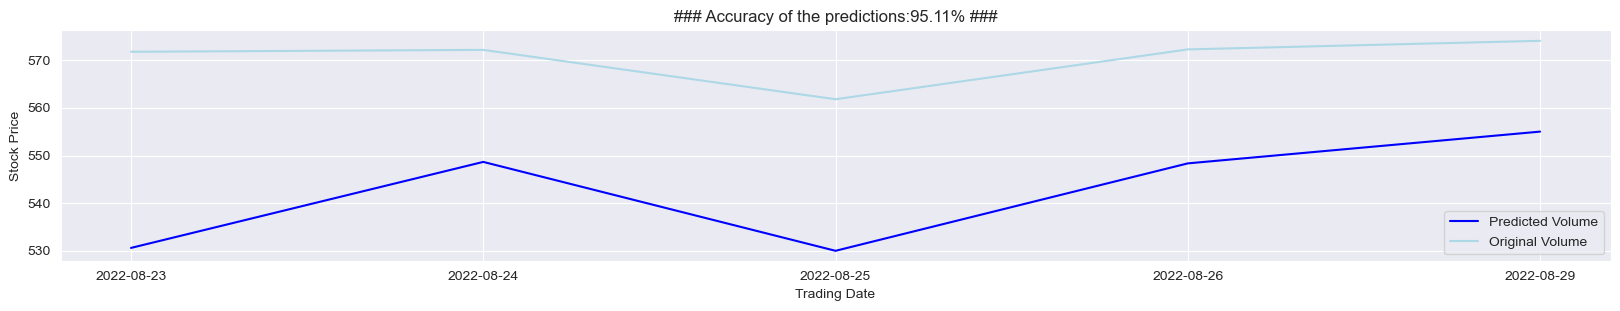

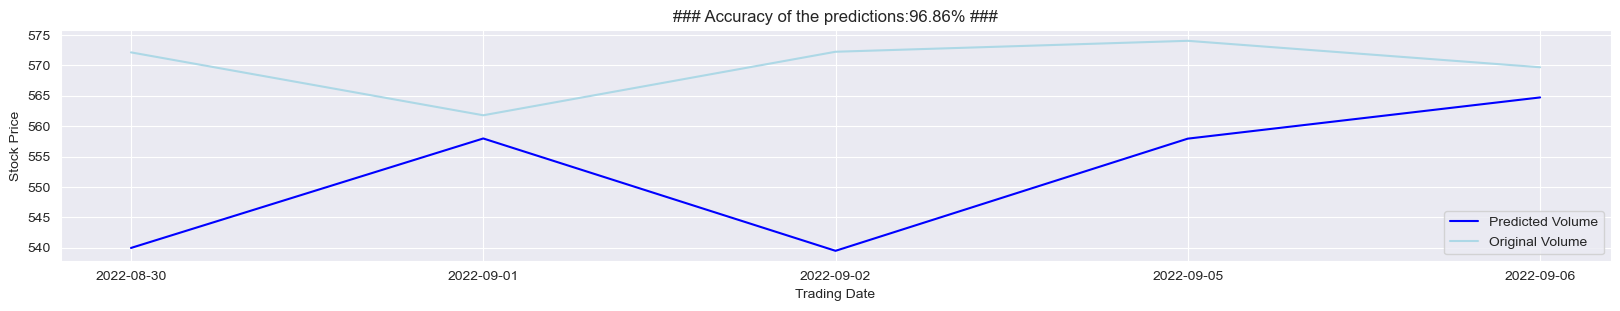

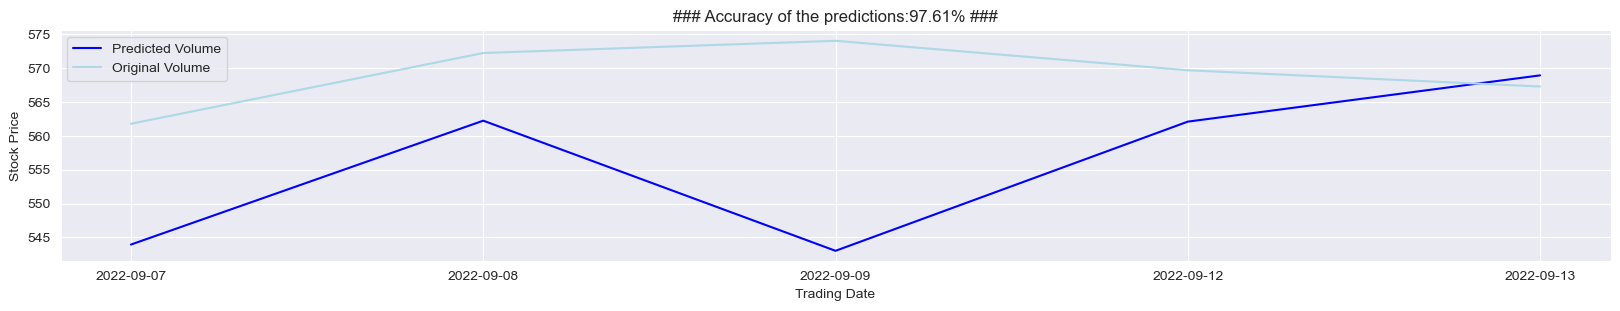

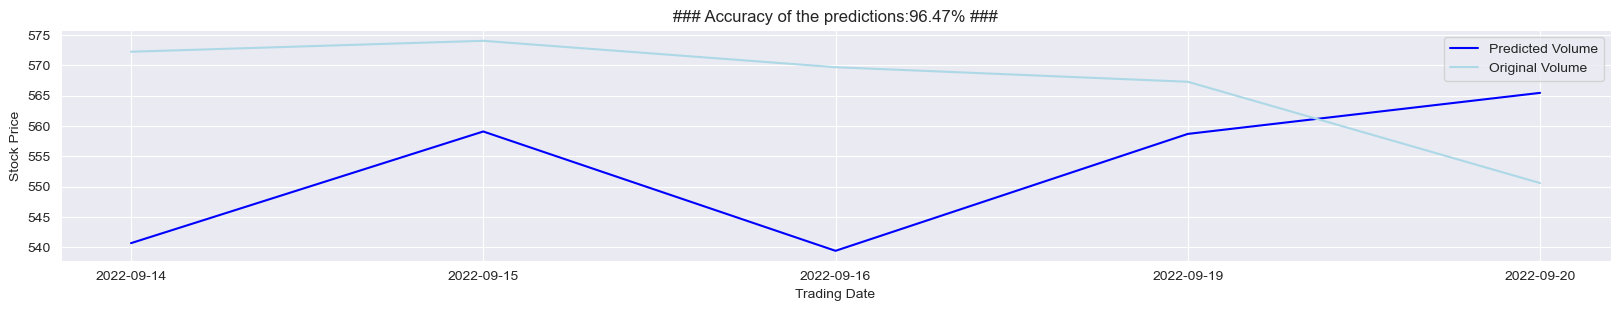

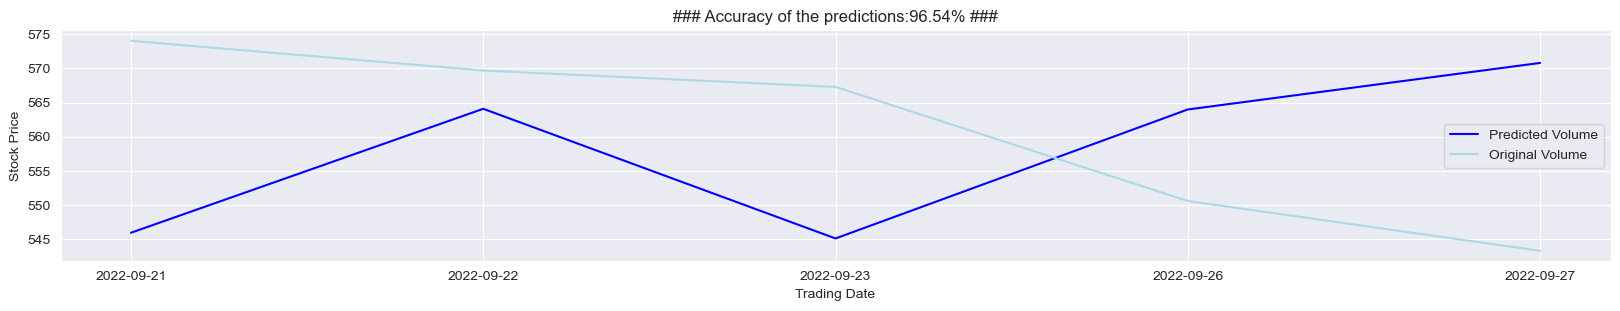

In [15]:

import matplotlib.pyplot as plt
 
for i in range(len(orig)):
    Prediction=predicted_Price[i]
    Original=orig[i]
    
    # Visualising the results
    plt.plot(Prediction, color = 'blue', label = 'Predicted Volume')
    plt.plot(Original, color = 'lightblue', label = 'Original Volume')
 
    plt.title('### Accuracy of the predictions:'+ str(100 - (100*(abs(Original-Prediction)/Original)).mean().round(2))+'% ###')
    plt.xlabel('Trading Date')
    
    startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
    endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
    TotalRows=StockData.shape[0]
 
    plt.xticks(range(FutureTimeSteps), StockData.iloc[TotalRows-endDateIndex : TotalRows-(startDateIndex) , :]['TradeDate'])
    plt.ylabel('Stock Price')
 
    plt.legend()
    fig=plt.gcf()
    fig.set_figwidth(20)
    fig.set_figheight(3)
    plt.show()

In [16]:
last10days = StockData['Close'].iloc[-10:]
last10daysarray = np.array(last10days)
last10daysarray = last10daysarray.reshape(-1,1)
testing = DataScaler.transform(last10daysarray)

In [17]:
# the day which starts before the predictions 
LastdayofPrice = datetime(2022,9,27)

#getting the dates for the 5 days after the start of the prediction 
next5days= [LastdayofPrice+timedelta(days =i ) for i in range(5) ]
newnext5days = [i.strftime('%Y-%m-%d') for i in next5days]

NumberofSamples=1
TimeSteps=testing.shape[0]
NumberofFeatures=testing.shape[1]
# Reshaping the data as 3D input
testing=testing.reshape(NumberofSamples,TimeSteps,NumberofFeatures)
 
# Generating the predictions for next 5 days
Next5DaysPrice = regressor.predict(testing)

# Generating the prices in original scale
Next5DaysPrice = DataScaler.inverse_transform(Next5DaysPrice)
Next5DaysPrice

1/1 [==============================] - 0s 14ms/step


array([[521.9135 , 539.9285 , 520.82635, 539.0853 , 545.53503]],
      dtype=float32)

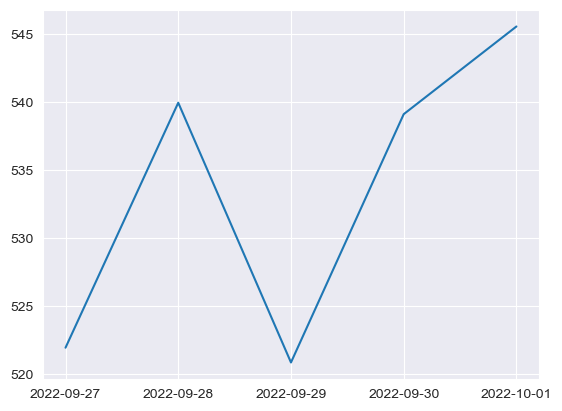

In [20]:
plt.plot(newnext5days,Next5DaysPrice[0])
# plt.plot(newnext5days,[i+27 for i in Next5DaysPrice[0]])
# plt.plot(newnext5days,[i-27 for i in Next5DaysPrice[0]])